We plot the all the ARGO profilers data corresponding to a given month.

In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import glob
import os
import seawater
import cmocean
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
import Argo_functions
%matplotlib inline

In [18]:
rcParams.update({'font.size': 16})
figdir = "/home/ctroupin/Projects2/201501_InsTAC/Graphical _Material/2016_Q2/Profilers/"
datadir = "/data_local/DataOceano/CMEMS/INSITU_GLO_NRT_OBSERVATIONS_013_030/monthly/profiler-glider"
dlon, dlat = 2., 1.
mycolor = ['r', 'g', 'b', 'y']

Create rectangular regions where we will check if we have data

In [32]:
regions = [[0.0, 30., 30., 45.], 
           [-50, 0.0, 40., 80.],
           [-50., 0.0, -20., 0.],
           [100., 150., -60., -40.]]
nregions = len(regions)
print(nregions)

4


In [79]:
psal2plot = np.array([])


figname = 'test1.png'
datafilelist = sorted(glob.glob(os.path.join(datadir, '*.nc')))
fig = plt.figure(figsize=(10, 10))
for datafiles in datafilelist[0:4]:
    print('Working on %s' %(datafiles))
    figbasename = os.path.basename(datafiles)[:-3]
          
    # Read the variables from the data file
    time, time_units, lon, lat, pressure, temp, temp_qc, psal, psal_qc = Argo_functions.read_variables(datafiles)
    
    print('_____________')
    print time.shape
    print lon.shape
    print lat.shape
    print pressure.shape
    print temp.shape
    #pressure
    
    # Convert time to dates and change the vector to a 2D array
    datesarray = Argo_functions.convert_time(time, time_units, pressure)
    
    # Compute initial and final dates
    dayinit, dayend = Argo_functions.get_init_final_dates(datesarray)
    
    # Apply QC
    temp, psal = Argo_functions.apply_qc_variables(temp, temp_qc, psal, psal_qc)
    
    # Convert pressure to depth using [Saunders (1981)] formula
    #depth = seawater.eos80.dpth(pressure, np.tile(lat, (pressure.shape[1], 1)).T)
    
    
    # Attribute the coordinates to one of the region
    goodcoord = []
    for ii in range(0, len(regions)):
        #print('Region no. %i' %(ii))
        goodcoord = np.where((lon>=regions[ii][0]) & (lon<=regions[ii][1]) &
                             (lat>=regions[ii][2]) & (lat<=regions[ii][3]))[0]
        #plt.subplot(1, len(regions), ii+1)
        print psal[goodcoord, :].ravel()
        
        psal2plot = np.append(psal2plot, psal[goodcoord, :].ravel().compressed())
        
        #plt.plot(psal[goodcoord, :], temp[goodcoord, :], 'o', color=mycolor[ii], markersize=0.5)

    
    # Plots:
    # -----------------------------
    
#plt.plot(psal2plot[0], temp2plot[0], color=mycolor[0])
#plt.plot(psal2plot[1], temp2plot[1], color=mycolor[1])

plt.grid()
plt.savefig(os.path.join(figdir, figname), dpi=300)
plt.close()
# T-S diagram
    # density, density2plot = compute_density()
    # plot_TS(temp, psal, depth)
    
    # Trajectory of the profiler
    #plot_trajectory(lon, lat, dlon, dlat, figbasename, dayinit, dayend)

Working on /data_local/DataOceano/CMEMS/INSITU_GLO_NRT_OBSERVATIONS_013_030/monthly/profiler-glider/GL_201605_PR_GL_58970.nc
_____________
(709,)
(709,)
(709,)
(709, 355)
(709, 355)
[-- -- -- ..., -- -- --]
[]
[]
[]
Working on /data_local/DataOceano/CMEMS/INSITU_GLO_NRT_OBSERVATIONS_013_030/monthly/profiler-glider/GL_201605_PR_GL_6800957.nc
_____________
(5,)
(5,)
(5,)
(5, 1951)
(5, 1951)
[-- 38.867549896240234 -- ..., -- -- --]
[]
[]
[]
Working on /data_local/DataOceano/CMEMS/INSITU_GLO_NRT_OBSERVATIONS_013_030/monthly/profiler-glider/GL_201605_PR_GL_6801660.nc
_____________
(1093,)
(1093,)
(1093,)
(1093, 881)
(1093, 881)
[38.12648010253906 38.126129150390625 38.127410888671875 ..., -- -- --]
[]
[]
[]
Working on /data_local/DataOceano/CMEMS/INSITU_GLO_NRT_OBSERVATIONS_013_030/monthly/profiler-glider/GL_201605_PR_GL_6801661.nc
_____________
(2018,)
(2018,)
(2018,)
(2018, 967)
(2018, 967)
[38.12984085083008 38.12928009033203 38.12955856323242 ..., -- -- --]
[]
[]
[]


In [80]:
psal2plot.shape

(791047,)

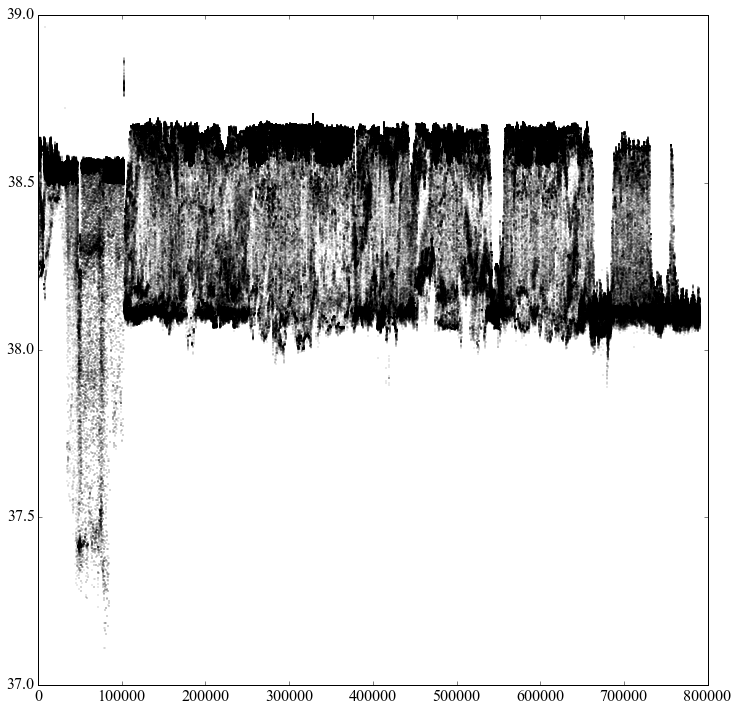

In [83]:
fig = plt.figure(figsize=(12, 12))
plt.plot(psal2plot, 'ko', markersize=0.2)
plt.show()

In [78]:
psal[goodcoord, :].ravel().compressed()

array([], dtype=float32)